<a href="https://colab.research.google.com/github/taxicabno1729/mathematics/blob/main/Grid_Search_using_Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Find optimal path on a grid to move from a source to destination using Q-learning.

Given a array grid (mXn) with destination marked as `1`, obstacles as -1, and all other cells with 0, and a starting point at (x,y), find the shortest path to reach destination.

P.S. Movements are restricted to only 0 (up), 1(right), 2(down) and 3(left)

### Initialize parameters.



In [19]:
import numpy as np
import random

# Define the grid world
grid = [
    [0, 0, 0, 1],
    [0, -1, 0, -1],
    [0, 0, 0, 0]
]

# Define actions
# 0: up, 1: right, 2: down, 3: left
actions = [0, 1, 2, 3]


### Initialize Q Table, create utils for get_next_state and get_reward

1. We create a numpy array of mXnXa, where m = rows of grid, n = columns of grid, a = no of actions (4 in our case) and initiate with zeros. This array signifies the reward of each action at each position in the grid. Example, Array[1,2,0] denotes the reward at position 1X2 in the grid for action 0 (moving up).

2. A util function which gives us the next position for a certain action. Given as state s and action a, it returns the next state s_.

3. Another util function which gives us the reward for each state. Given position mXn on grid, it is 1 if it the destination, -1 if it is an obstacle, and -0.04 as step reward (This is done to incentivize the model to find the shortest path possible, and hence penalize non optimal movement).

In [22]:
# Initialize Q-table
q_table = np.zeros((len(actions), len(grid), len(grid[0])))

def get_next_state(state, action):
    row, col = state
    if action == 0:  # up
        row = max(0, row - 1)
    elif action == 1:  # right
        col = min(len(grid[0]) - 1, col + 1)
    elif action == 2:  # down
        row = min(len(grid) - 1, row + 1)
    elif action == 3:  # left
        col = max(0, col - 1)
    return (row, col)

# Define rewards
goal_reward = 1
obstacle_reward = -1
step_reward = -0.04

def get_reward(state):
    row, col = state
    if grid[row][col] == 1:  # goal
        return goal_reward
    elif grid[row][col] == -1:  # obstacle
        return obstacle_reward
    else:
        return step_reward


### Training the agent

In [23]:
# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
episodes = 1000

for _ in range(episodes):
    state = (2, 0)  # starting position
    done = False

    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = np.argmax(q_table[:, state[0], state[1]])

        next_state = get_next_state(state, action)
        reward = get_reward(next_state)

        # Q-value update
        old_q = q_table[action, state[0], state[1]]
        next_max = np.max(q_table[:, next_state[0], next_state[1]])
        new_q = (1 - learning_rate) * old_q + learning_rate * (reward + discount_factor * next_max)
        q_table[action, state[0], state[1]] = new_q

        state = next_state
        if reward == goal_reward or reward == obstacle_reward:
            done = True

### Get Optimal Path

In [25]:
# Function to get the optimal path
def get_optimal_path():
    state = (2, 0)  # starting position
    path = [state]
    while grid[state[0]][state[1]] != 1:  # while not at goal
        action = np.argmax(q_table[:, state[0], state[1]])
        state = get_next_state(state, action)
        path.append(state)
    return path

# Print the optimal path
optimal_path = get_optimal_path()
print("Optimal path:", optimal_path)

# Print the Q-table
print("\nQ-table:")
print(q_table)

Optimal path: [(2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3)]

Q-table:
[[[-0.0157616   0.12295796  0.81930449  0.        ]
  [ 0.44669467  0.          0.86        0.        ]
  [ 0.2198405  -0.94185026  0.734      -0.19      ]]

 [[ 0.67444168  0.85679647  1.          0.        ]
  [-0.1         0.         -0.89058101  0.        ]
  [ 0.51854     0.6206      0.40539268 -0.01540876]]

 [[-0.01825422 -0.19        0.68657147  0.        ]
  [-0.03698888  0.          0.52478401  0.        ]
  [ 0.40870494  0.47081168  0.60329639 -0.0118804 ]]

 [[-0.01945588  0.02494749  0.60024148  0.        ]
  [-0.03810421  0.         -0.92023356  0.        ]
  [ 0.39860726  0.39671418  0.47610112  0.58982062]]]


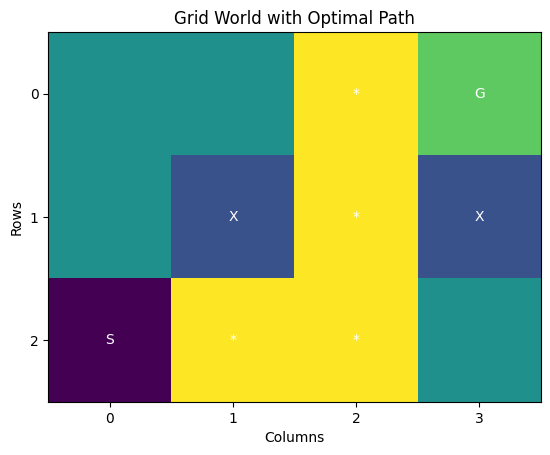

In [17]:
import matplotlib.pyplot as plt

def plot_grid_and_path(grid, path):
  rows = len(grid)
  cols = len(grid[0])
  grid_plot = [[0 for _ in range(cols)] for _ in range(rows)]

  for r in range(rows):
    for c in range(cols):
      if grid[r][c] == -1:
        grid_plot[r][c] = -1 ## Obstacle
      elif grid[r][c] == 1:
        grid_plot[r][c] = 1 ## Goal

  r0, c0 = path[0]
  grid_plot[r0][c0] = -2 ## Source

  for r, c in path[1:]:
    if grid_plot[r][c] != 1:
      grid_plot[r][c] = 2 ## Path

  fig, ax = plt.subplots()
  ax.imshow(grid_plot, cmap='viridis', interpolation='nearest')

  for r in range(rows):
    for c in range(cols):
        if grid_plot[r][c] == -1:
            ax.text(c, r, 'X', ha="center", va="center", color="white")
        elif grid_plot[r][c] == 1:
            ax.text(c, r, 'G', ha="center", va="center", color="white")
        elif grid_plot[r][c] == 2:
            ax.text(c, r, '*', ha="center", va="center", color="white")
        elif grid_plot[r][c] == -2:
            ax.text(c, r, 'S', ha="center", va="center", color="white")

  ax.set_xticks(np.arange(cols))
  ax.set_yticks(np.arange(rows))
  ax.set_xticklabels(np.arange(cols))
  ax.set_yticklabels(np.arange(rows))
  ax.set_xlabel('Columns')
  ax.set_ylabel('Rows')
  ax.set_title('Grid World with Optimal Path')
  plt.show()

plot_grid_and_path(grid, optimal_path)
